<a href="https://colab.research.google.com/github/Juandavidmarint/data-analysis-logistica/blob/main/analisis_logistico_entregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga del Dataset y análisis de datos, inventario, cumplimiento KPIs y graficas relevantes

In [1]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('pedidos_ejemplo.csv')

# Ver las primeras filas
df.head()


,pedido_id,fecha_pedido,cliente,ciudad,producto,entrega_dias,entrega_a_tiempo
0,1,2024-01-01,Juan,Bogotá,Zapatos,2,True
1,2,2024-01-02,Ana,Medellín,Camisa,3,True
2,3,2024-01-03,Luis,Santiago,Pantalón,5,False
3,4,2024-01-03,Carlos,Bogotá,Zapatos,1,True
4,5,2024-01-04,Lucía,Medellín,Camisa,4,False


In [2]:
# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pedido_id         5 non-null      int64 
 1   fecha_pedido      5 non-null      object
 2   cliente           5 non-null      object
 3   ciudad            5 non-null      object
 4   producto          5 non-null      object
 5   entrega_dias      5 non-null      int64 
 6   entrega_a_tiempo  5 non-null      bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 377.0+ bytes


,pedido_id,entrega_dias
count,5.000000,5.000000
mean,3.000000,3.000000
std,1.581139,1.581139
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


Exploración inicial de datos


In [3]:
# Tiempo promedio de entrega
tiempo_promedio = df["entrega_dias"].mean()
print(f"Tiempo promedio de entrega: {tiempo_promedio:.2f} días")


Tiempo promedio de entrega: 3.00 días


In [4]:
# Porcentaje de entregas a tiempo
porc_otd = df["entrega_a_tiempo"].mean() * 100
print(f"Porcentaje de entregas a tiempo: {porc_otd:.1f}%")


Porcentaje de entregas a tiempo: 60.0%


In [5]:
# Promedio de días de entrega por ciudad
entregas_ciudad = df.groupby("ciudad")["entrega_dias"].mean()
print(entregas_ciudad)


ciudad
Bogotá      1.5
Medellín    3.5
Santiago    5.0
Name: entrega_dias, dtype: float64


In [9]:
print(df.columns)


Index(['pedido_id', 'fecha_pedido', 'cliente', 'ciudad', 'producto',
       'entrega_dias', 'entrega_a_tiempo'],
      dtype='object')


In [11]:
print(df.head)


<bound method NDFrame.head of    pedido_id fecha_pedido cliente    ciudad  producto  entrega_dias  \
0          1   2024-01-01    Juan    Bogotá   Zapatos             2   
1          2   2024-01-02     Ana  Medellín    Camisa             3   
2          3   2024-01-03    Luis  Santiago  Pantalón             5   
3          4   2024-01-03  Carlos    Bogotá   Zapatos             1   
4          5   2024-01-04   Lucía  Medellín    Camisa             4   

   entrega_a_tiempo  
0              True  
1              True  
2             False  
3              True  
4             False  >


In [12]:
!pip install matplotlib seaborn


Gráfica de número de entregas por ciudad

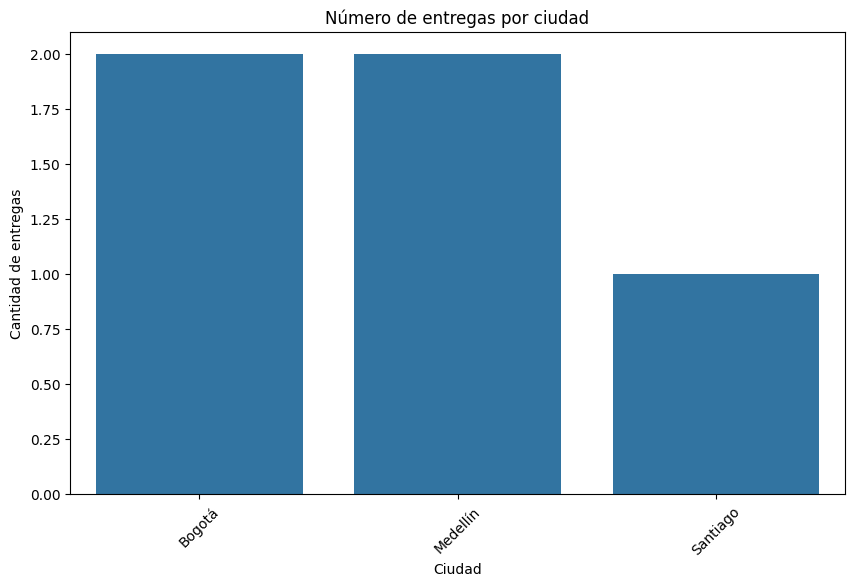

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar entregas por ciudad
entregas_por_ciudad = df["ciudad"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=entregas_por_ciudad.index, y=entregas_por_ciudad.values)
plt.title("Número de entregas por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de entregas")
plt.xticks(rotation=45)
plt.show()


Gráfica de distribución de los días de entrega

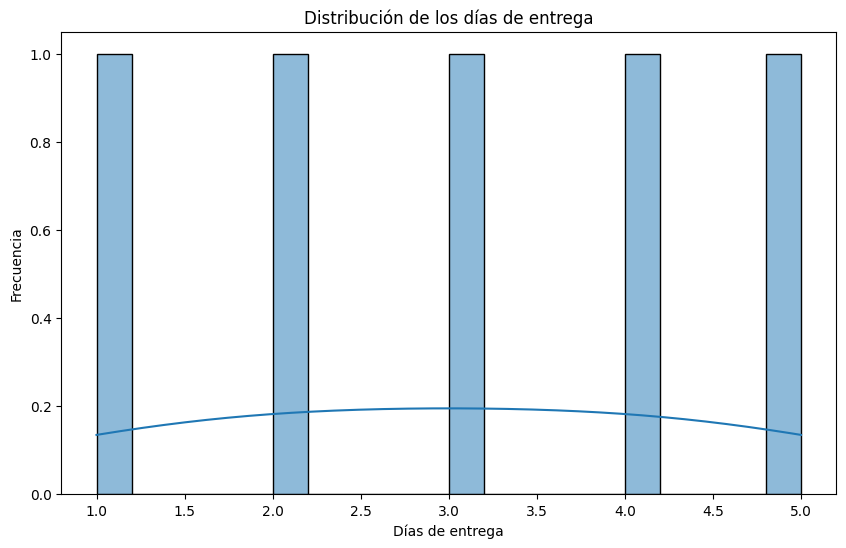

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df["entrega_dias"], bins=20, kde=True)
plt.title("Distribución de los días de entrega")
plt.xlabel("Días de entrega")
plt.ylabel("Frecuencia")
plt.show()


Distribución de los dias de entrega por producto

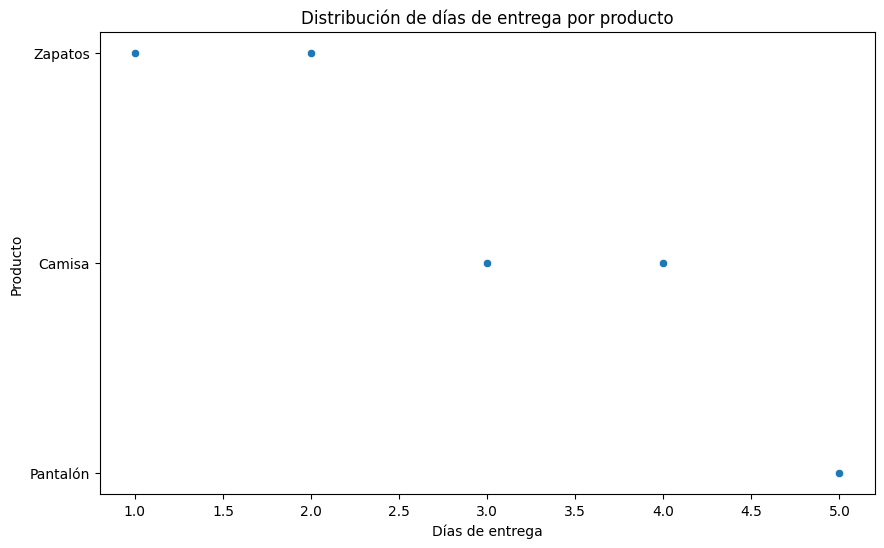

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["entrega_dias"], y=df["producto"])
plt.title("Distribución de días de entrega por producto")
plt.xlabel("Días de entrega")
plt.ylabel("Producto")
plt.show()


Limpieza de datos, valores nulos, inconsistentes, duplicados o incoherentes

In [22]:
df.isnull().sum()


,0
pedido_id,0
fecha_pedido,0
cliente,0
ciudad,0
producto,0
entrega_dias,0
entrega_a_tiempo,0


In [23]:
df = df.dropna()


In [24]:
df.duplicated().sum()  # ¿Cuántos duplicados hay?
df = df.drop_duplicates()


In [25]:
df[df["entrega_dias"] < 0]  # Filtra los valores problemáticos


,pedido_id,fecha_pedido,cliente,ciudad,producto,entrega_dias,entrega_a_tiempo


In [26]:
df = df[df["entrega_dias"] >= 0]


In [27]:
df["fecha_pedido"] = pd.to_datetime(df["fecha_pedido"])


In [28]:
df.dtypes


,0
pedido_id,int64
fecha_pedido,datetime64[ns]
cliente,object
ciudad,object
producto,object
entrega_dias,int64
entrega_a_tiempo,bool


In [29]:
df["producto"] = df["producto"].astype("category")
df["ciudad"] = df["ciudad"].astype("category")


Análisis visual y metricas logísticas

In [30]:
df.groupby("ciudad")["entrega_dias"].mean().sort_values(ascending=False)


<ipython-input-30-beb6bc4e05e7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ciudad")["entrega_dias"].mean().sort_values(ascending=False)


,entrega_dias
ciudad,
Santiago,5.0
Medellín,3.5
Bogotá,1.5


Tiempo promedio de entrega por ciudad

<ipython-input-31-6ffbb638a355>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ciudades_promedio = df.groupby("ciudad")["entrega_dias"].mean().sort_values()


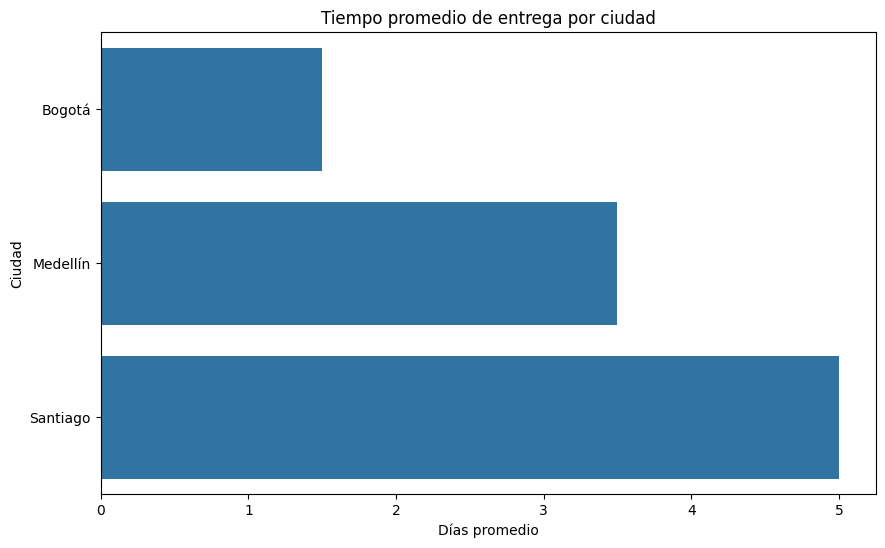

In [31]:
ciudades_promedio = df.groupby("ciudad")["entrega_dias"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=ciudades_promedio.values, y=ciudades_promedio.index)
plt.title("Tiempo promedio de entrega por ciudad")
plt.xlabel("Días promedio")
plt.ylabel("Ciudad")
plt.show()


In [32]:
df["producto"].value_counts()


,count
producto,
Camisa,2
Zapatos,2
Pantalón,1


Productos mas solicitados

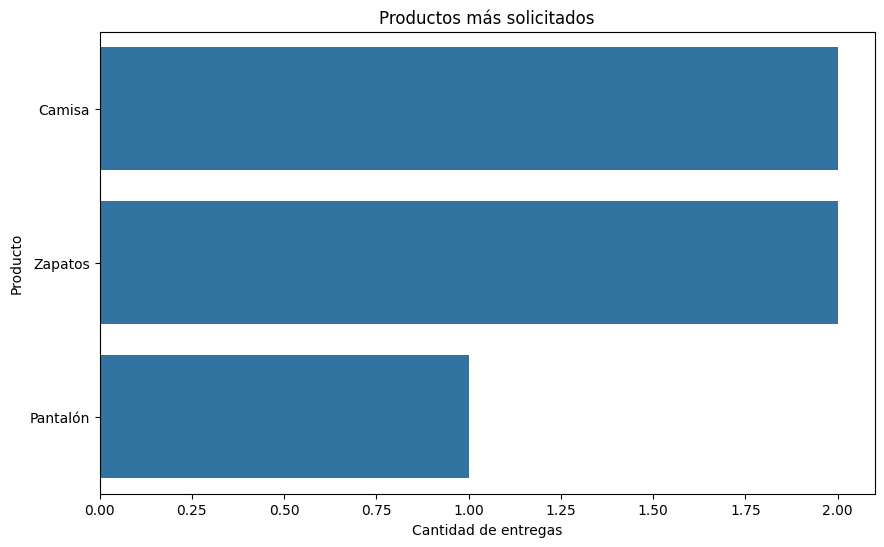

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(y="producto", data=df, order=df["producto"].value_counts().index)
plt.title("Productos más solicitados")
plt.xlabel("Cantidad de entregas")
plt.ylabel("Producto")
plt.show()


Entregas a tiempo y fuera de tiempo

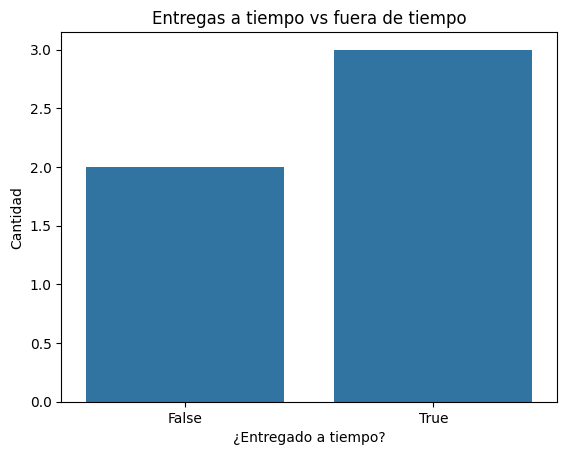

In [34]:
sns.countplot(x="entrega_a_tiempo", data=df)
plt.title("Entregas a tiempo vs fuera de tiempo")
plt.xlabel("¿Entregado a tiempo?")
plt.ylabel("Cantidad")
plt.show()


Top 5 de ciudades con mas entregas

Top de ciudades con mas entregas

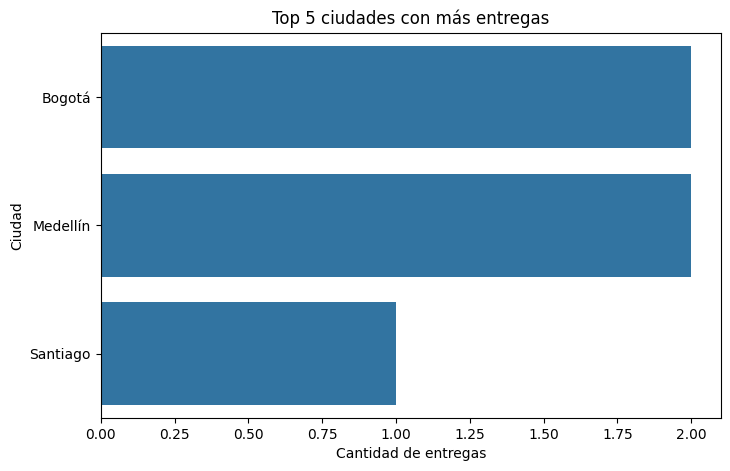

In [35]:
top_ciudades = df["ciudad"].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_ciudades.values, y=top_ciudades.index)
plt.title("Top 5 ciudades con más entregas")
plt.xlabel("Cantidad de entregas")
plt.ylabel("Ciudad")
plt.show()


Creación de columna para entregas a tiempo

In [36]:
# Creamos la columna basada en los días de entrega
df["entrega_a_tiempo"] = df["entrega_dias"].apply(lambda x: "Sí" if x <= 3 else "No")


In [37]:
df[["entrega_dias", "entrega_a_tiempo"]].head(10)


,entrega_dias,entrega_a_tiempo
0,2,Sí
1,3,Sí
2,5,No
3,1,Sí
4,4,No


Fue creada satisfactoriamente

Se identificarán oportunidades de mejora con base en los datos

In [42]:
ciudad_peor = df.groupby("ciudad", observed=True)["entrega_dias"].mean().idxmax()
tiempo_peor = df.groupby("ciudad", observed=True)["entrega_dias"].mean().max()


In [44]:
# Total de entregas
total_entregas = len(df)

# 1. % de entregas fuera de tiempo
fuera_tiempo = df[df["entrega_a_tiempo"] == "No"]
porcentaje_fuera_tiempo = (len(fuera_tiempo) / total_entregas) * 100

# 2. Ciudad con peor tiempo promedio de entrega
ciudad_peor = df.groupby("ciudad")["entrega_dias"].mean().idxmax()
tiempo_peor = df.groupby("ciudad")["entrega_dias"].mean().max()

# 3. Producto con más entregas retrasadas
producto_retrasado = fuera_tiempo["producto"].value_counts().idxmax()
cant_retrasos = fuera_tiempo["producto"].value_counts().max()

# 4. % de entregas en menos de 3 días
entregas_rapidas = df[df["entrega_dias"] <= 3]
porcentaje_rapidas = (len(entregas_rapidas) / total_entregas) * 100

# 5. Mostrar resumen
print("🔎 Resumen Logístico:")
print(f"- Entregas fuera de tiempo: {porcentaje_fuera_tiempo:.2f}%")
print(f"- Ciudad con peor promedio de entrega: {ciudad_peor} ({tiempo_peor:.1f} días)")
print(f"- Producto con más retrasos: {producto_retrasado} ({cant_retrasos} veces)")
print(f"- Entregas en menos de 3 días: {porcentaje_rapidas:.2f}%")


🔎 Resumen Logístico:
- Entregas fuera de tiempo: 40.00%
- Ciudad con peor promedio de entrega: Santiago (5.0 días)
- Producto con más retrasos: Camisa (1 veces)
- Entregas en menos de 3 días: 60.00%


<ipython-input-44-3c4c8e874feb>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ciudad_peor = df.groupby("ciudad")["entrega_dias"].mean().idxmax()
<ipython-input-44-3c4c8e874feb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempo_peor = df.groupby("ciudad")["entrega_dias"].mean().max()
